In [1]:
import torch
import torchvision
from torchvision import datasets,transforms
from torch.utils.data import DataLoader, Dataset
import numpy as np

C:\Users\Ashwin\miniconda3\envs\PyTorch\lib\site-packages\torchvision\io\image.py:11: UserWarning: Failed to load image Python extension: Could not find module 'C:\Users\Ashwin\miniconda3\envs\PyTorch\Lib\site-packages\torchvision\image.pyd' (or one of its dependencies). Try using the full path with constructor syntax.
  warn(f"Failed to load image Python extension: {e}")


In [2]:
transform=transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=(0.1307,),std=(0.3081))
])

In [3]:
training_data=torchvision.datasets.MNIST(root='C:/Datasets',train=True, transform=transform,download=True)

In [4]:
trainLoader=DataLoader(training_data,batch_size=64,shuffle=True)

In [5]:
for images,labels in trainLoader:
    print(images.size(),labels.size())
    break
    

torch.Size([64, 1, 28, 28]) torch.Size([64])


In [6]:
batches=iter(trainLoader)

In [7]:
batches

In [8]:
one_batch=next(batches)

In [9]:
one_batch[1].size()

torch.Size([64])

In [10]:
images,labels=one_batch
print(images.size(),labels.size())

torch.Size([64, 1, 28, 28]) torch.Size([64])


In [11]:
import matplotlib.pyplot as plt

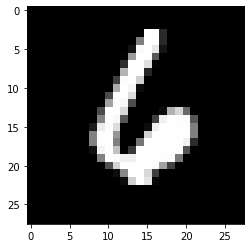

In [12]:
plt.imshow(torch.squeeze(images[0]),cmap='Greys_r')

In [13]:
testing_data=torchvision.datasets.MNIST(root='C:/Datasets',train=False, transform=transform,download=True)

In [14]:
testLoader=DataLoader(testing_data,batch_size=64,shuffle=True)

In [15]:
len(one_batch[1])

64

In [16]:
import torch.nn as nn

In [17]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Sequential(         
            nn.Conv2d(
                in_channels=1,              
                out_channels=3,            
                kernel_size=5,              
                stride=1,                   
                padding=2,                  
            ),                              
            nn.ReLU(),                      
            nn.MaxPool2d(kernel_size=2),    
        )
        self.conv2 = nn.Sequential(         
            nn.Conv2d(3, 32, 5, 1, 2),     
            nn.ReLU(),                      
            nn.MaxPool2d(2),                
        )
        # fully connected layer, output 10 classes
        self.out = nn.Linear(32 * 7 * 7, 10)
        self.softmax=nn.Softmax()
        
    def forward(self, x):
        x = self.conv1(x)
        x = self.conv2(x)
        # flatten the output of conv2 to (batch_size, 32 * 7 * 7)
        x = x.view(x.size(0), -1)       
        output = self.softmax(self.out(x))
        return output  # return x for visualization

In [18]:
def getAccuracy(images,labels):
    accuracy=[]
    for i in range(len(images)):
        if torch.argmax(images[i]).item()==labels[i].item():
            accuracy.append(1)
        else:
            accuracy.append(0)
    return sum(accuracy)/len(accuracy)

def train(model,loader,criterion,optimizer,num_epochs=5):
    metrics={
        'Accuracy':[],
        'Loss':[]
    }
    for epoch in range(num_epochs):
        for images,labels in loader:
            optimizer.zero_grad()
            outputs=model(images)
            # print(outputs)
            loss=criterion(outputs,labels)
            loss.backward()
            optimizer.step()
            metrics['Loss'].append(loss.item())
            accuracy=getAccuracy(outputs,labels)
            metrics['Accuracy'].append(accuracy)
        print('Accuracy/Epoch:',100*sum(metrics['Accuracy'])/len(metrics['Accuracy']))
        print('Loss/Epoch:',sum(metrics['Loss'])/len(metrics['Loss']))
    return metrics
    

In [19]:
model=Net()
criterion=nn.CrossEntropyLoss()
optimizer=torch.optim.Adam(model.parameters())

In [20]:
model

Net(
  (conv1): Sequential(
    (0): Conv2d(1, 3, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv2): Sequential(
    (0): Conv2d(3, 32, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (out): Linear(in_features=1568, out_features=10, bias=True)
  (softmax): Softmax(dim=None)
)

In [54]:
metrics=train(model,trainLoader,criterion,optimizer,num_epochs=1)

C:\Users\Ashwin\AppData\Local\Temp\ipykernel_11604\895184374.py:29: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = self.softmax(self.out(x))


Accuracy/Epoch: 97.10654317697228
Loss/Epoch: 1.4921538668400698


In [55]:
def plotMetrics(metric):
    plt.figure(figsize=(8,8))
    plt.plot([x for x in range(len(metric))],metric)

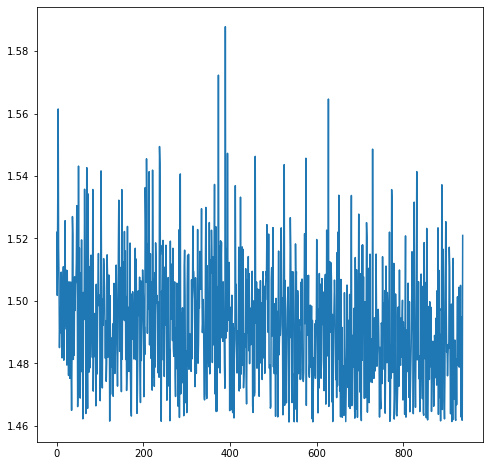

In [56]:
plotMetrics(metrics['Loss'])

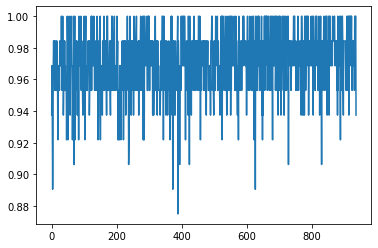

In [57]:
plt.plot(metrics['Accuracy'])

In [58]:
correct = 0
total = 0
with torch.no_grad():
    for data in testLoader:
        images, labels = data
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 38 %


C:\Users\Ashwin\AppData\Local\Temp\ipykernel_11604\895184374.py:29: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = self.softmax(self.out(x))


In [59]:
from torchvision.datasets import ImageFolder

In [60]:
sample_transforms=transforms.Compose([
    transforms.Resize((30,30)),
    transforms.ToTensor(),
    transforms.Grayscale(),
    transforms.CenterCrop((28,28)),
    transforms.Normalize(mean=(0.1307,),std=(0.3081))
])
sample=ImageFolder("./sample",transform=sample_transforms)

In [61]:
sample.class_to_idx

{'0': 0,
 '1': 1,
 '2': 2,
 '3': 3,
 '4': 4,
 '5': 5,
 '6': 6,
 '7': 7,
 '8': 8,
 '9': 9}

In [62]:
testLoader=DataLoader(sample)

In [63]:
batch=iter(testLoader)
img,l=next(batch)

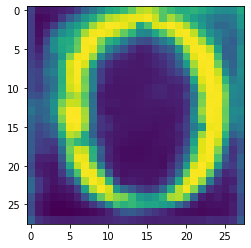

In [64]:
plt.imshow(torch.squeeze(img))

In [65]:
correct = 0
total = 0
wrong_images=[]
with torch.no_grad():
    for data in testLoader:
        images, labels = data
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        print(predicted,labels)
        if predicted != labels:
            wrong_images.append([images,predicted])
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

tensor([0]) tensor([0])
tensor([7]) tensor([1])
tensor([2]) tensor([2])
tensor([3]) tensor([3])
tensor([0]) tensor([4])
tensor([5]) tensor([5])
tensor([5]) tensor([6])
tensor([1]) tensor([7])
tensor([1]) tensor([7])
tensor([8]) tensor([8])
tensor([2]) tensor([9])
tensor([3]) tensor([9])
tensor([4]) tensor([9])
Accuracy of the network on the 10000 test images: 38 %


C:\Users\Ashwin\AppData\Local\Temp\ipykernel_11604\895184374.py:29: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = self.softmax(self.out(x))


In [66]:
len(wrong_images)

8

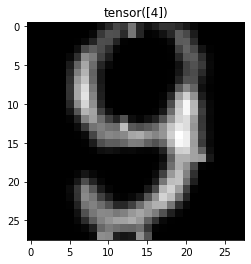

In [67]:
image=7
plt.title(wrong_images[image][1])
plt.imshow(torch.squeeze(wrong_images[image][0]),cmap="gray")

In [ ]:
print(wrong_images[0][1])

tensor([2])
